In [12]:
import read_bayesnet
from read_bayesnet import BayesianNetwork, Variable
import pandas as pd

In [2]:
bn = BayesianNetwork(file='asia.bif')  # example usage for the supplied earthquake.bif file
for v in bn.variables:
    print('node : ',v.name,'\nparents : ',v.parents,'\nmarkov blanket : ',v.markov_blanket,'\nprobs : ',v.probabilities,'\n')

node :  asia 
parents :  [] 
markov blanket :  ['tub'] 
probs :  {'yes': 0.4, 'no': 0.6} 

node :  tub 
parents :  ['asia'] 
markov blanket :  ['asia', 'lung', 'either'] 
probs :  {('yes',): {'yes': 0.33, 'no': 0.67}, ('no',): {'yes': 0.9, 'no': 0.1}} 

node :  smoke 
parents :  [] 
markov blanket :  ['lung', 'bronc'] 
probs :  {'yes': 0.5, 'no': 0.5} 

node :  lung 
parents :  ['smoke'] 
markov blanket :  ['smoke', 'tub', 'either'] 
probs :  {('yes',): {'yes': 0.1, 'no': 0.9}, ('no',): {'yes': 0.2, 'no': 0.8}} 

node :  bronc 
parents :  ['smoke'] 
markov blanket :  ['smoke', 'dysp', 'either'] 
probs :  {('yes',): {'yes': 0.6, 'no': 0.4}, ('no',): {'yes': 0.3, 'no': 0.7}} 

node :  either 
parents :  ['lung', 'tub'] 
markov blanket :  ['lung', 'tub', 'dysp', 'xray', 'bronc'] 
probs :  {('yes', 'yes'): {'yes': 0.09, 'no': 0.91}, ('no', 'yes'): {'yes': 0.74, 'no': 0.26}, ('yes', 'no'): {'yes': 0.7, 'no': 0.3}, ('no', 'no'): {'yes': 0.13, 'no': 0.87}} 

node :  xray 
parents :  ['either'

# Running the algorithm with different iterations

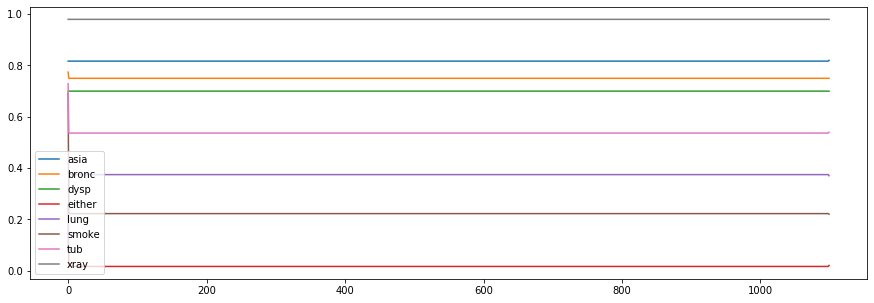

In [7]:
res, df = bn.gibbs_sampling(iterations=1000)
df.plot(figsize=(15,5))

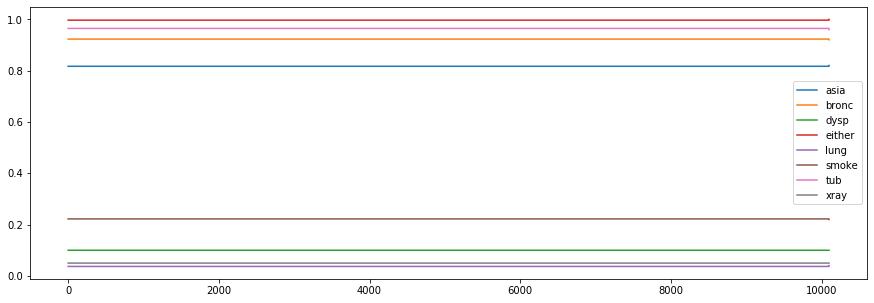

In [8]:
res, df = bn.gibbs_sampling(iterations=10000)
df.plot(figsize=(15,5))

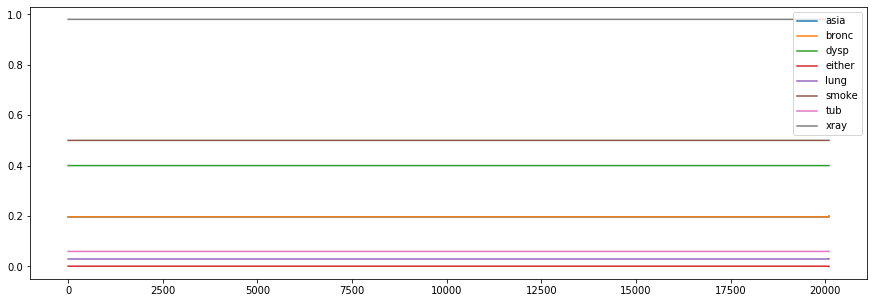

In [9]:
res, df = bn.gibbs_sampling(iterations=20000)
df.plot(figsize=(15,5))

# Running the algorithms many times so it uses different samples

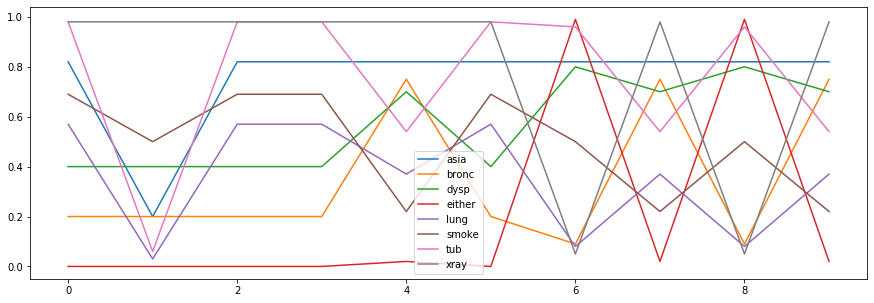

In [11]:
df = pd.DataFrame()

for i in range(10):
    results, _ = bn.gibbs_sampling(iterations=1000)
    df= df.append(results,ignore_index=True)
    print(i,end='\r')
    
df = df.applymap(lambda x : x['yes'])
df.plot(figsize=(15,5))